# Ch.4 Getting started with neural networks: Classification and regression

Contents:
* 실제 기계 학습 워크플로의 첫 번째 예
* 벡터 데이터에 대한 분류(classification) 문제 다루기
* 벡터 데이터에 대한 연속 회귀(regression) 문제 다루기

## Classifying movie reviews: A binary classification example

### The IMDB dataset

인터넷 영화 데이터베이스에서 50,000개의 고도로 양극화된 리뷰 세트인 IMDB 데이터 세트로 작업하게 됩니다. 훈련용 리뷰 25,000개와 테스트용 리뷰 25,000개로 나뉘며 각 세트는 50%의 부정적인 리뷰와 50%의 긍정적인 리뷰로 구성됩니다.

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)   # use 10,000 most frequently used words

In [11]:
print(len(train_data[0]))  # list length 
train_data[0]

218


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [13]:
train_labels[0]

1

In [16]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [26]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])  # reverse key and value
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # 0,1,2 indexes are reserved
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [27]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [37]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-01.png" width="150"><p style="text-align:center">Figure 4.1 The three-layer model</p>

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-02.png" width="300"><p style="text-align:center">Figure 4.2 The rectified linear unit function</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-03.png" width="300"><p style="text-align:center">Figure 4.3 The sigmoid function</p>

**Compiling the model**

In [39]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 143ms/step - loss: 0.5156 - accuracy: 0.7823 - val_loss: 0.3817 - val_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3104 - accuracy: 0.9004 - val_loss: 0.3058 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2289 - accuracy: 0.9246 - val_loss: 0.2833 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1815 - accuracy: 0.9415 - val_loss: 0.2756 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1499 - accuracy: 0.9505 - val_loss: 0.2825 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1218 - accuracy: 0.9623 - val_loss: 0.2937 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1022 - accuracy: 0.9692 - val_loss: 0.3040 - val_accuracy: 0.8843
Epoch 8/20
3

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

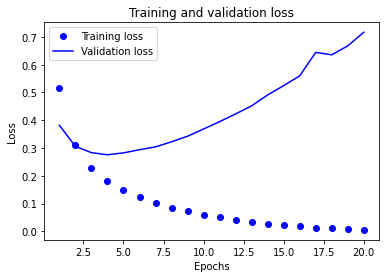

In [47]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

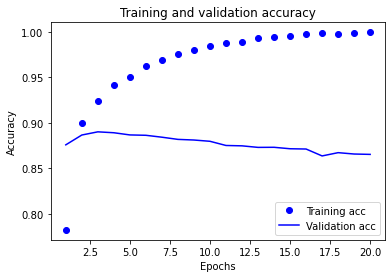

In [48]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [49]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4629 - accuracy: 0.8203
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2674 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2061 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2956 - accuracy: 0.8818


In [50]:
results

[0.29562297463417053, 0.8818399906158447]

### Using a trained model to generate predictions on new data

In [51]:
model.predict(x_test)

array([[0.24301034],
       [0.999645  ],
       [0.9369861 ],
       ...,
       [0.13795337],
       [0.07727703],
       [0.6191259 ]], dtype=float32)

### Further experiments

In [52]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 50ms/step - loss: 0.4244 - accuracy: 0.8142
Epoch 2/4
49/49 [==============================] - 2s 41ms/step - loss: 0.2469 - accuracy: 0.9047 1s - loss: 0.2553 - accuracy: 0.90 - ETA: 1s
Epoch 3/4
49/49 [==============================] - 2s 39ms/step - loss: 0.1854 - accuracy: 0.9315
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.3159 - accuracy: 0.8804


[0.31585532426834106, 0.8804399967193604]

### Wrapping up

* preprocess data
* Dense, relu
* binary classification: Dense, 1 unit, sigmoid, binary_crossentropy
* rmsprop: generally good
* overfitting (monitor the validation set performance)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

Short neswires and their topics from Reuters (1986)

46 topics

Not balanced

**Loading the Reuters dataset**

In [53]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [54]:
len(train_data)

8982

In [55]:
len(test_data)

2246

In [56]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [57]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [62]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [63]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [64]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [65]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [70]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [71]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [72]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [73]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 81ms/step - loss: 2.4596 - accuracy: 0.5297 - val_loss: 1.6747 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.3772 - accuracy: 0.7035 - val_loss: 1.3081 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0316 - accuracy: 0.7750 - val_loss: 1.1079 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8066 - accuracy: 0.8274 - val_loss: 1.0050 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6361 - accuracy: 0.8661 - val_loss: 0.9323 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5110 - accuracy: 0.8968 - val_loss: 0.9135 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.4091 - accuracy: 0.9142 - val_loss: 0.8997 - val_accuracy: 0.8080
Epoch 8/20
16


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-06.png" width="300"><p style="text-align:center">Figure 4.6 Training and validation loss</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-07.png" width="300"><p style="text-align:center">Figure 4.7 Training and validation accuracy</p>

**Plotting the training and validation loss**

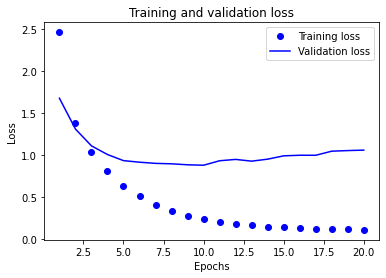

In [75]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

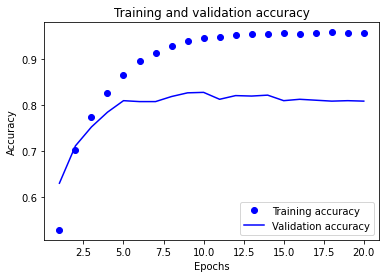

In [76]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [77]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.4755 - accuracy: 0.5186
Epoch 2/9
18/18 [==============================] - 1s 46ms/step - loss: 1.3213 - accuracy: 0.7251
Epoch 3/9
18/18 [==============================] - 1s 43ms/step - loss: 0.9802 - accuracy: 0.7911
Epoch 4/9
18/18 [==============================] - 1s 44ms/step - loss: 0.7685 - accuracy: 0.8352
Epoch 5/9
18/18 [==============================] - 1s 42ms/step - loss: 0.6042 - accuracy: 0.8701
Epoch 6/9
18/18 [==============================] - 1s 42ms/step - loss: 0.4806 - accuracy: 0.8972
Epoch 7/9
18/18 [==============================] - 1s 44ms/step - loss: 0.3866 - accuracy: 0.9184
Epoch 8/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3162 - accuracy: 0.9316
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9692 - accuracy: 0.7952


In [78]:
results

[0.96921706199646, 0.7951914668083191]

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

### Generating predictions on new data

In [79]:
predictions = model.predict(x_test)

In [80]:
predictions[0].shape

(46,)

In [81]:
np.sum(predictions[0])

1.0000002

In [82]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [85]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [86]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",   # for integer label
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [87]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.9203 - accuracy: 0.2095 - val_loss: 2.2152 - val_accuracy: 0.4410
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 1.7599 - accuracy: 0.5956 - val_loss: 1.5583 - val_accuracy: 0.6090
Epoch 3/20
63/63 [==============================] - 1s 22ms/step - loss: 1.3359 - accuracy: 0.6584 - val_loss: 1.4135 - val_accuracy: 0.6680
Epoch 4/20
63/63 [==============================] - 2s 24ms/step - loss: 1.1486 - accuracy: 0.7051 - val_loss: 1.3384 - val_accuracy: 0.6710
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 1.0191 - accuracy: 0.7502 - val_loss: 1.3190 - val_accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9176 - accuracy: 0.7796 - val_loss: 1.3225 - val_accuracy: 0.6970
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8345 - accuracy: 0.7942 - val_loss: 1.3239 - val_accuracy: 0.7080
Epoch 8/20
63

### Further experiments

* larger or smaller layers : 32 units, 128 units
* 1 or 3 hidden layers

### Wrapping up

* N classes => Dense with N units
* `softmax` activarion (single label)
* loss : Categorical crossentropy (minimizes distance between probability distributions)
* encoding
  - one-hot (loss = `categorical_crossentropy`)
  - integers (loss = `sparse_categorical_crossentropy`)
* avoid information bottlenecks in hidden layers

## Predicting house prices: A regression example

**회귀(Regression)** : 이산(discrete) 레이블 대신 연속(continuous) 값 예측

e.g.

* 기상 데이터를 바탕으로 내일 **기온 예측**
* 사양이 주어지면 소프트웨어 프로젝트가 완료되는 데 걸리는 **시간**을 예측합니다.

### The Boston Housing Price dataset

이 섹션에서는 범죄율, 지역 재산세율 등과 같은 당시 교외 지역에 대한 데이터 포인트를 고려하여 1970년대 중반 보스턴 교외 지역의 주택 중간 가격을 예측하려고 시도합니다. 우리가 사용할 데이터 세트는 이전 두 가지 예와 흥미로운 차이점이 있습니다. 상대적으로 적은 데이터 포인트를 가지고 있습니다: 506개, 404개의 훈련 샘플과 102개의 테스트 샘플로 나뉩니다. 그리고 입력 데이터의 각 특성(예: 범죄율)은 척도가 다릅니다. 예를 들어, 일부 값은 0과 1 사이의 값을 취하는 비율이고, 다른 값은 1과 12 사이의 값을 취하며, 다른 값은 0과 100 사이의 값을 취하는 식입니다.

**Loading the Boston housing dataset**

In [88]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [89]:
train_data.shape

(404, 13)

In [90]:
test_data.shape

(102, 13)

In [91]:
train_targets   # in $1,000 unit

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [92]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [93]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [105]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

### Building your model

**Model definition**

In [94]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-08.png" width="300"><p style="text-align:center">Figure 4.8 K-fold cross-validation with K=3</p>

In [95]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [96]:
all_scores

[1.7510162591934204, 2.482182025909424, 2.418165683746338, 2.4425058364868164]

In [97]:
np.mean(all_scores)

2.2734674513339996

**Saving the validation logs at each fold**

In [98]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [99]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-09.png" width="300"><p style="text-align:center">Figure 4.9 Validation MAE by epoch</p>

**Plotting validation scores**

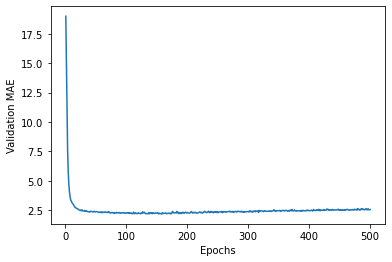

In [100]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

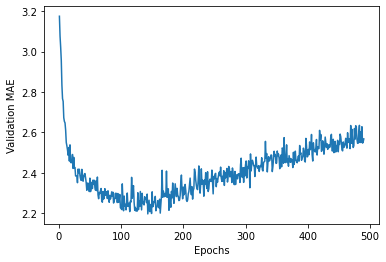

In [101]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-10.png" width="300"><p style="text-align:center">Figure 4.10 Validation MAE by epoch, excluding the first 10 data points</p>

그림 4.10에서 볼 수 있듯이 유효성 검사 MAE는 120–140 Epoch 후에 크게 개선되지 않습니다(이 숫자에는 우리가 생략한 10 Epoch가 포함됨). 그 지점을 지나면 과적합을 시작됩니다.

**Training the final model**

In [102]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 14.2994 - mae: 2.5388


In [103]:
test_mae_score

2.5387511253356934

### Generating predictions on new data

In [104]:
predictions = model.predict(test_data)
predictions[0]

array([8.144928], dtype=float32)

### Wrapping up

* regression: Mean squared error (`mse`)
* metric: Mean absolute error (`mae`)
* feature-wise normalization (scale them independently)
* few data: K-fold
* few data: small model (1-2 hidden layers) to avoid ovefitting

## Summary

* binary classification, multiclass classification, scalar regression
* preprocess raw data
* feature-wise scaling
* overfit after a point => worse results for validation data
* few data : small model
* for multiclass problems avoid information bottlenecks in hidden layers
few data: use K-fold to search for good parameters. Then use all data to train the final model